# House Pricing Machine Learning Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import PowerTransformer
from scipy import stats
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 150)

In [3]:
df_1 =pd.read_csv('data/train.csv')
df_2 =pd.read_csv('data/test.csv')
monthly_indices = pd.read_csv('data/monthly_indices.csv')
median_incomes = pd.read_csv('data/median_incomes.csv')

train_id = df_1['Id']
test_id = df_2['Id']

In [4]:
#Merging Data sets

df = pd.concat([df_1,df_2], sort=False)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
# Clean Variables

from scipy.stats import mode

df[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']] = df[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)

df [['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = np.where(df[['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].isnull(), 'N/A', df[['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']])

df[['Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'Functional', 'GarageCars', 'SaleType','MSZoning']] = df[['Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'Functional', 'GarageCars', 'SaleType','MSZoning']].fillna(df.mode().iloc[0])

df['GarageArea'] = df['GarageArea'].fillna(df.median().iloc[0])

In [6]:
# Define custom variables

df['YrsSinceRemod'] = df['YrSold'] - df['YearRemodAdd']
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [7]:
# Merge with external data

df = pd.merge(df, monthly_indices, how='left', left_on=['YrSold','MoSold'], right_on=['Year','Month'])
df = pd.merge(df, median_incomes, how='left', on=['Neighborhood'])

In [8]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

df['YearBuilt'] = df['YearBuilt'].astype(str)
df['Month'] = df['Month'].astype(str)
df['Year'] = df['Year'].astype(str)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119c83208>],
      dtype=object)

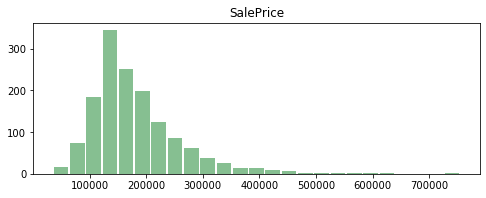

In [9]:
## Looking at distribution
df.hist(column='SalePrice', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)
## Y is skewed towards the right

In [10]:
# Log transformation
df['SalePrice'] = np.log(df['SalePrice'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1099a0c50>],
      dtype=object)

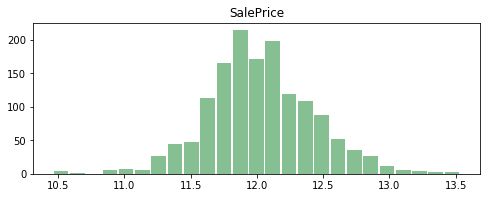

In [11]:
## After log transformation
df.hist(column='SalePrice', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

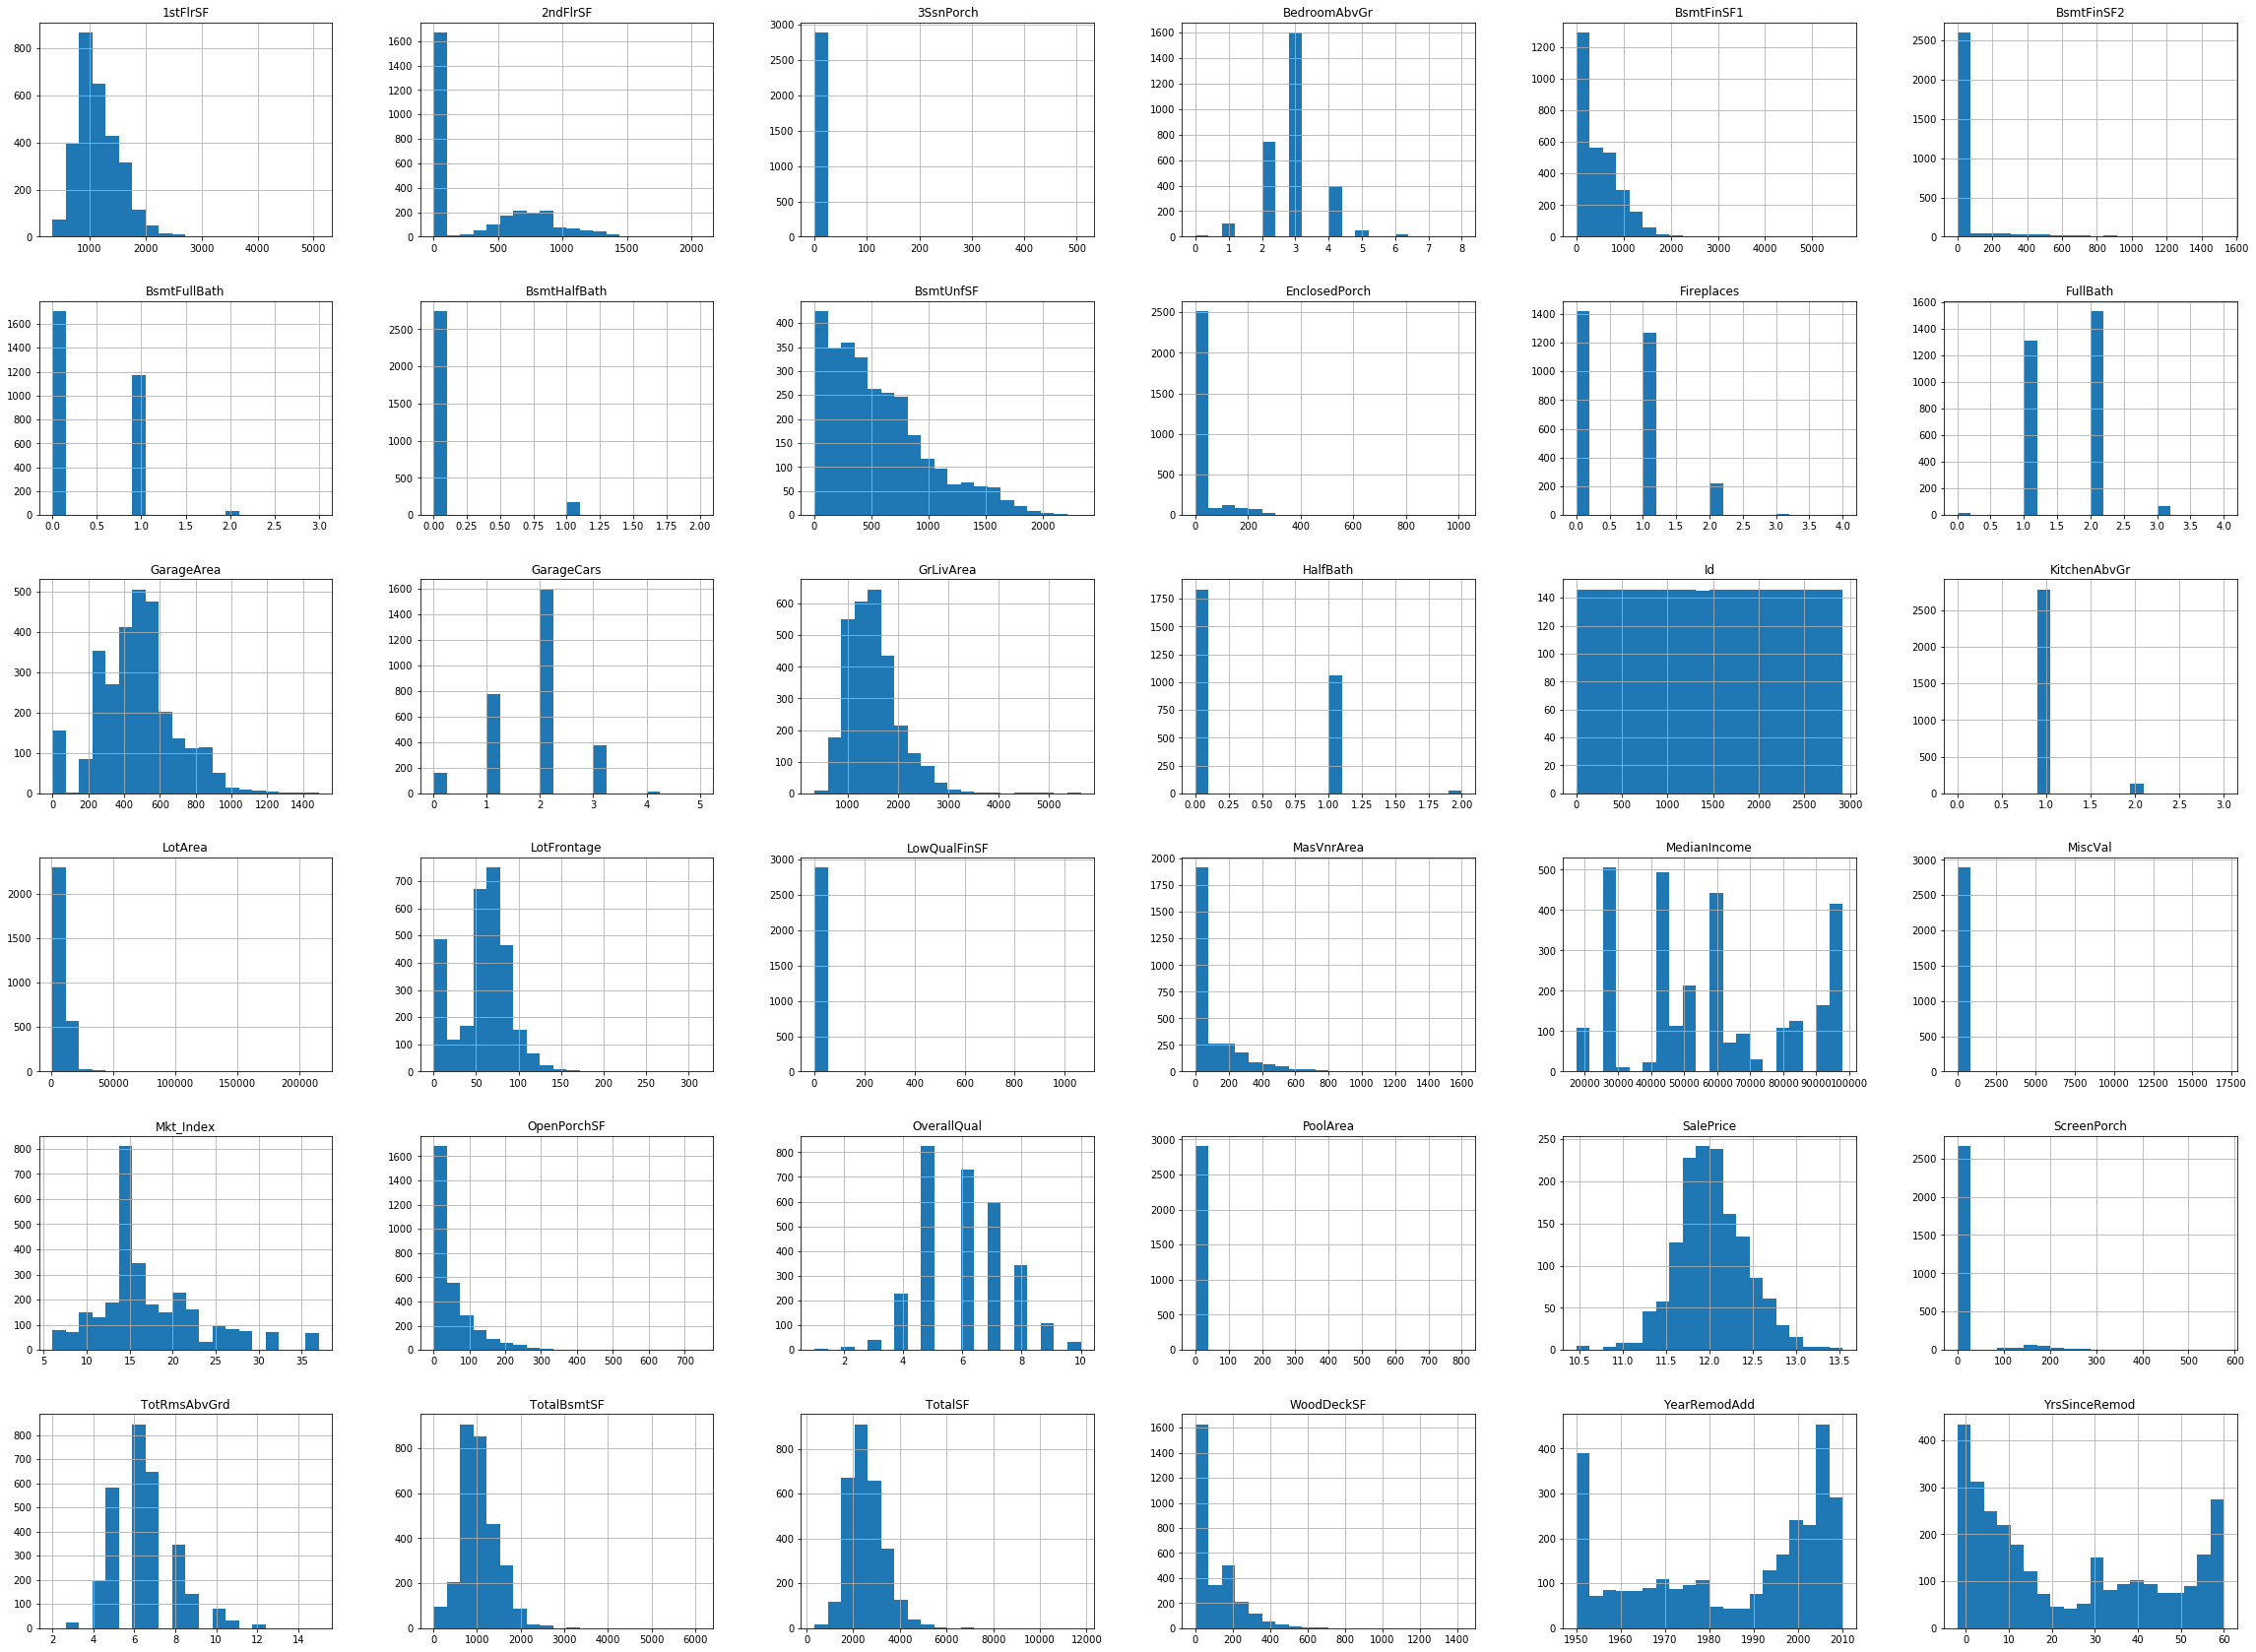

In [12]:
hist = df.hist(figsize=(40,30), bins=20)

In [13]:
from sklearn.preprocessing import RobustScaler
X = df.select_dtypes(include=np.number).drop(['SalePrice', 'Id'],axis=1)
transformer = RobustScaler().fit(X)
numeric_feats = pd.DataFrame(transformer.transform(X), columns=X.columns)

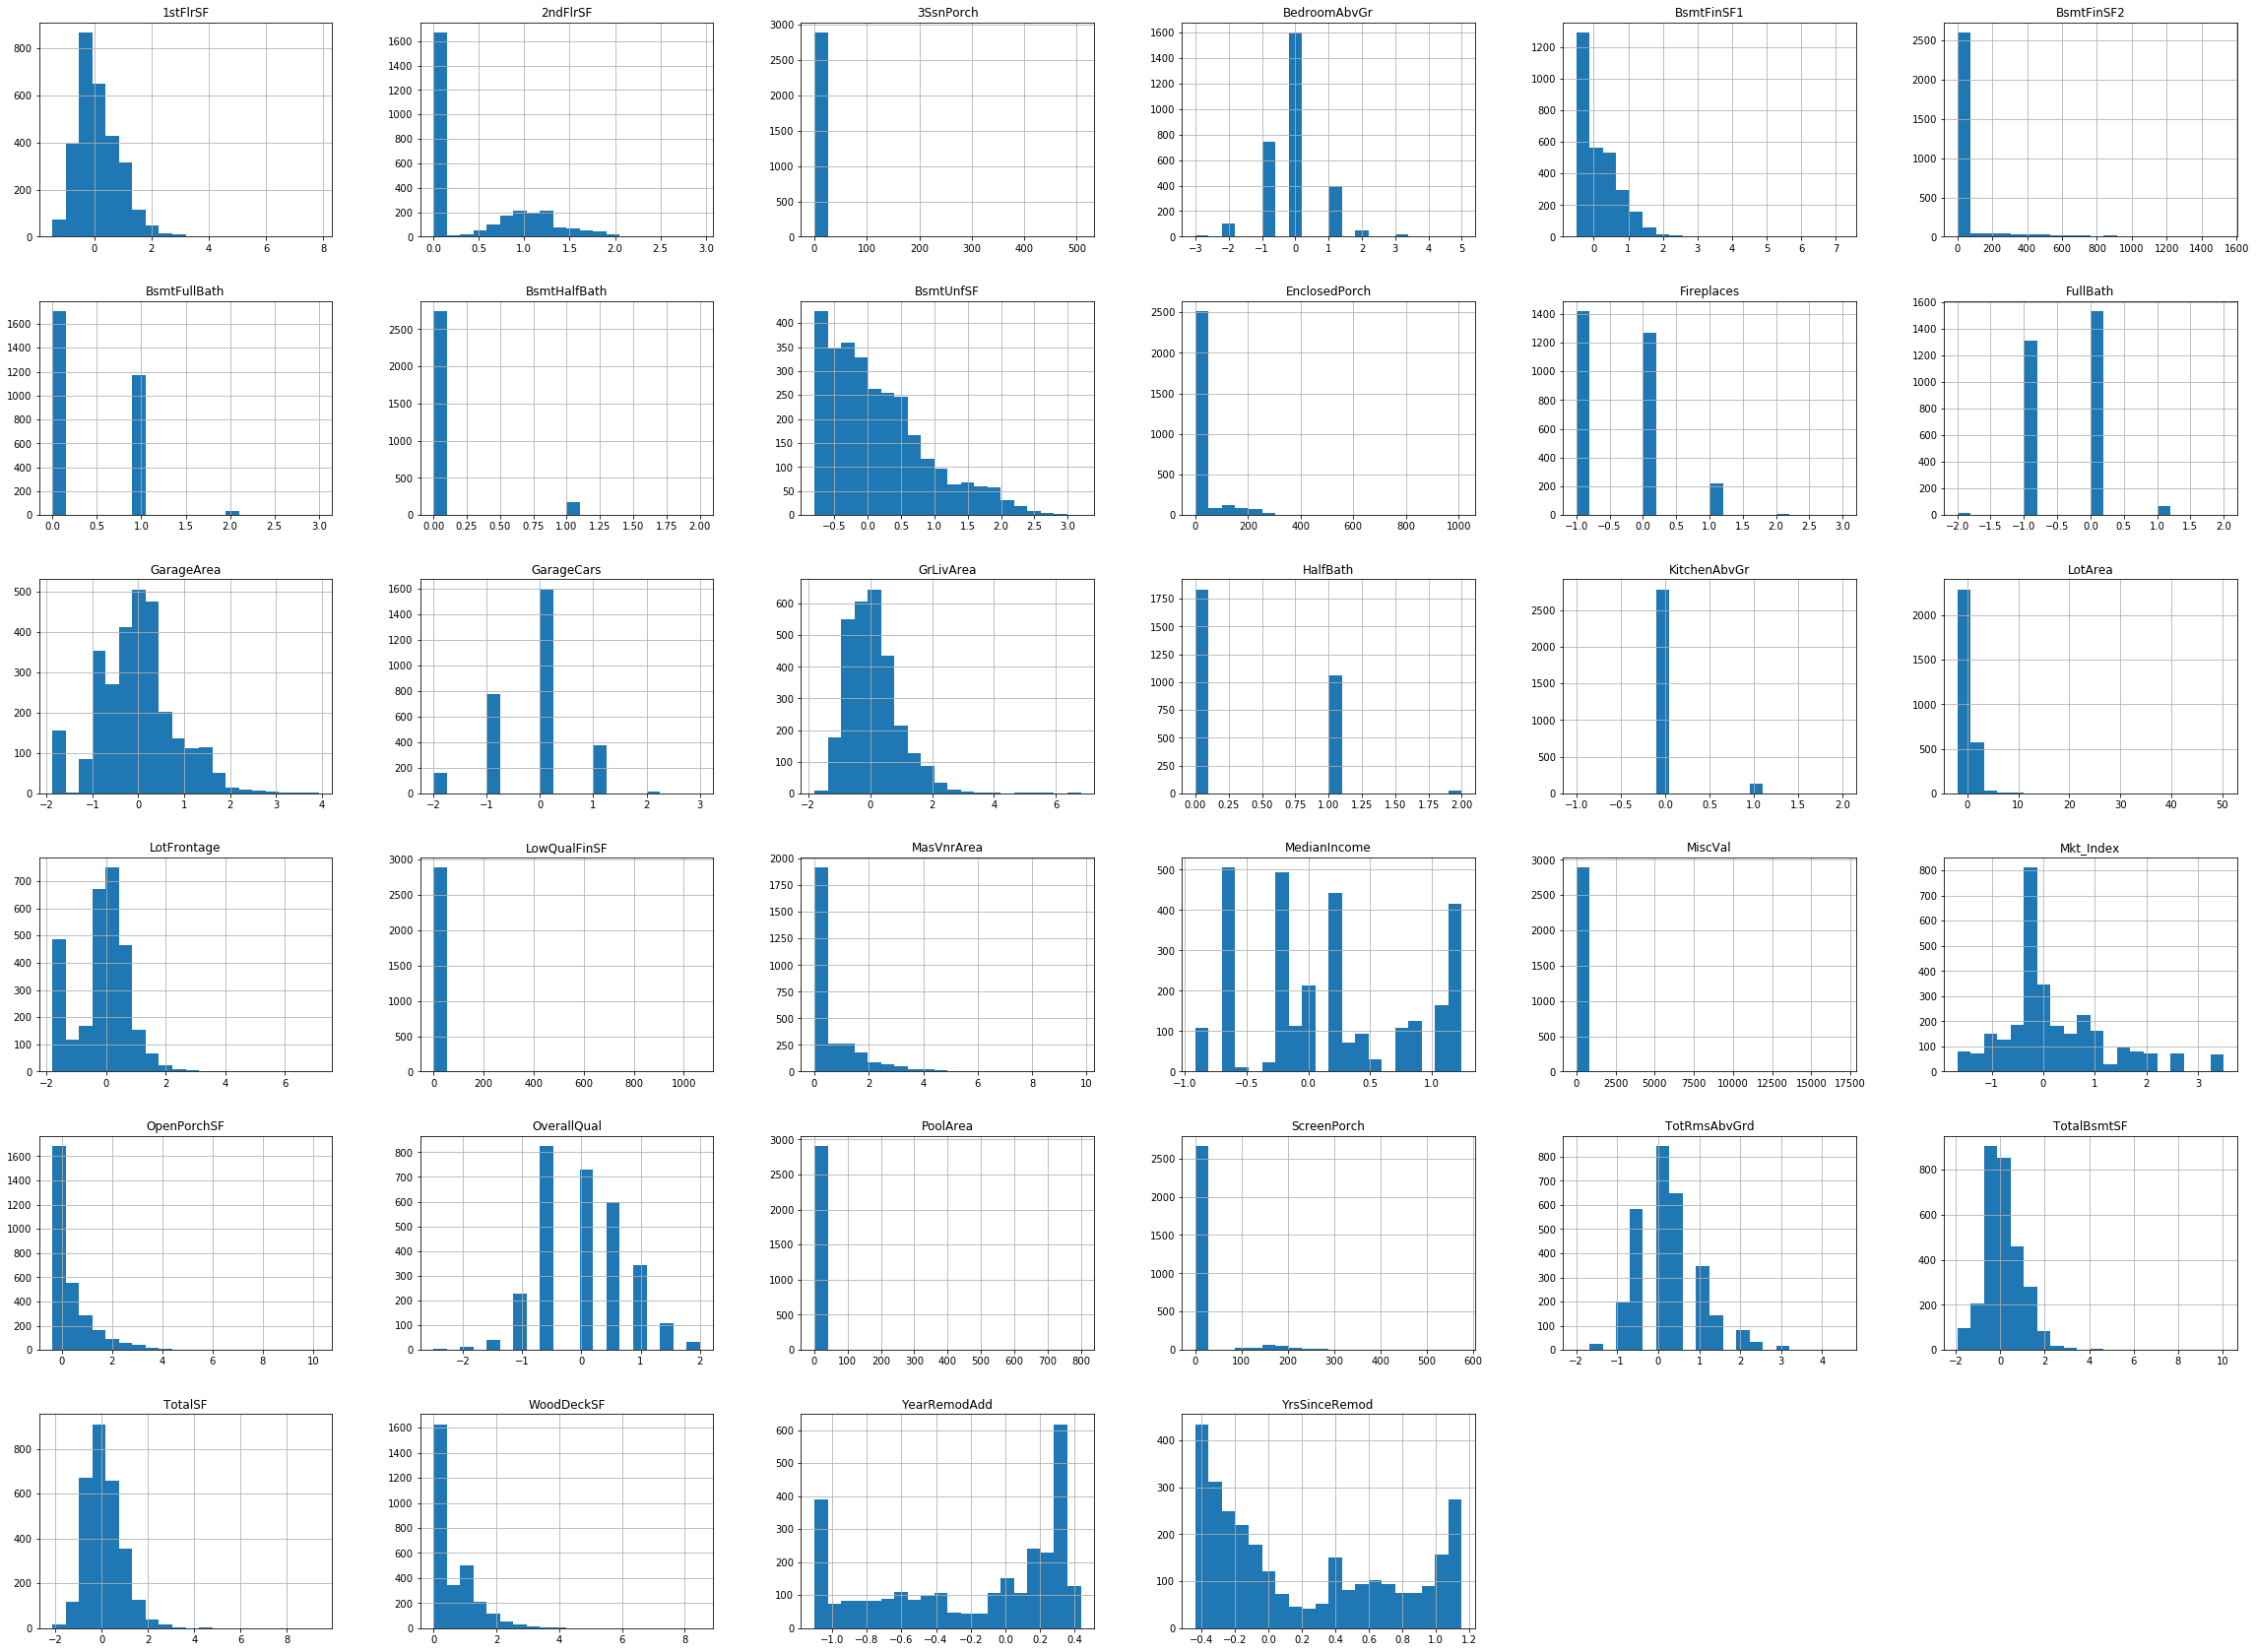

In [14]:
hist = numeric_feats.hist(figsize=(40,30), bins=20)

In [15]:
df = df.drop(numeric_feats.columns, axis=1)
df = df.join(numeric_feats)

In [16]:
#Re-splitting train and test sets

train = df.iloc[:1460]
test = df.iloc[1460:].drop(columns=['SalePrice'])

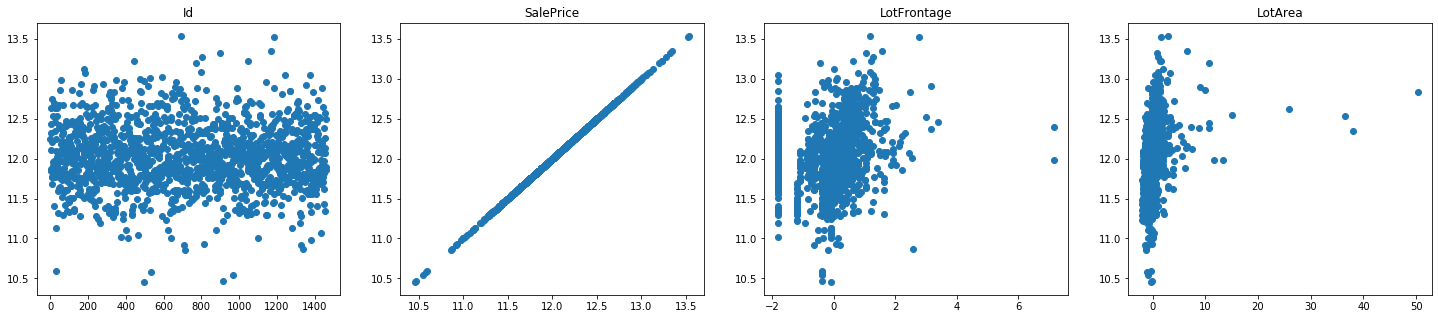

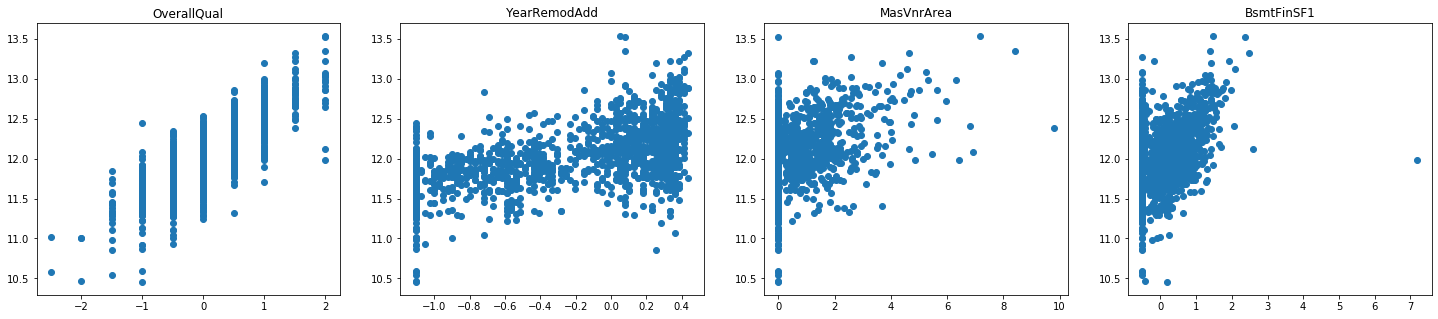

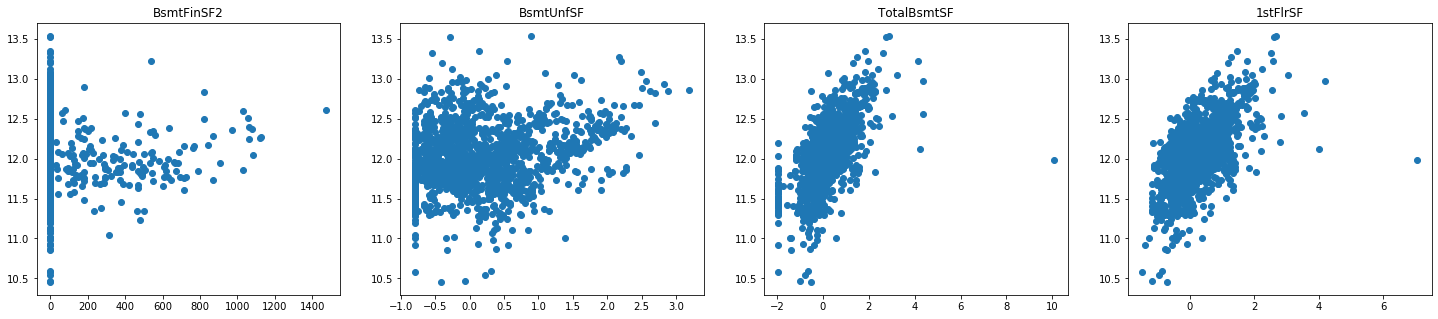

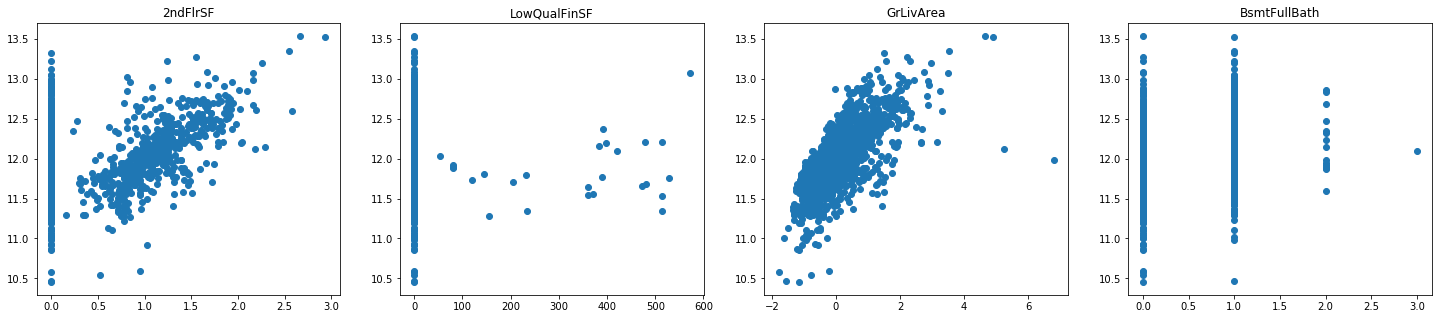

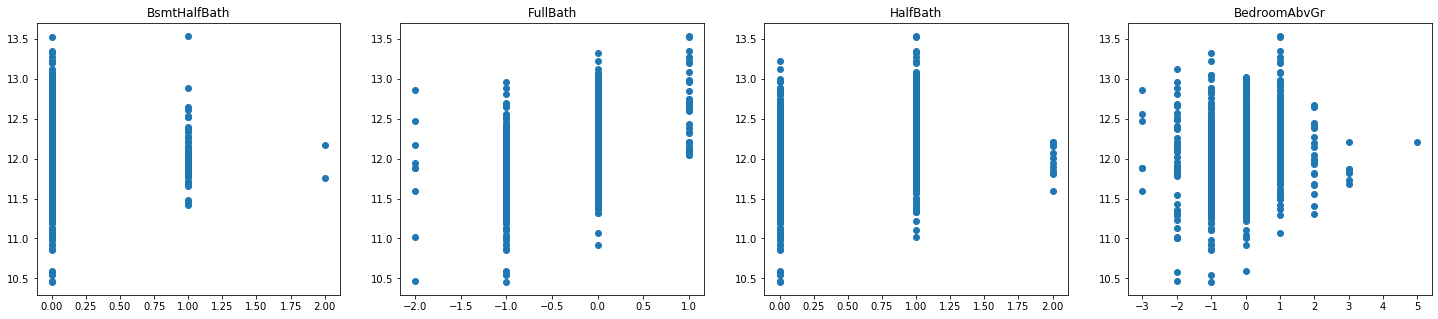

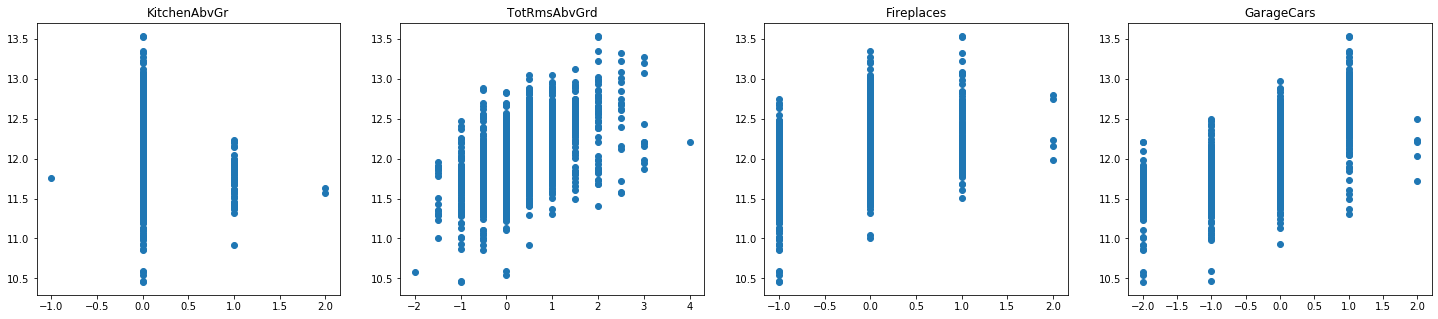

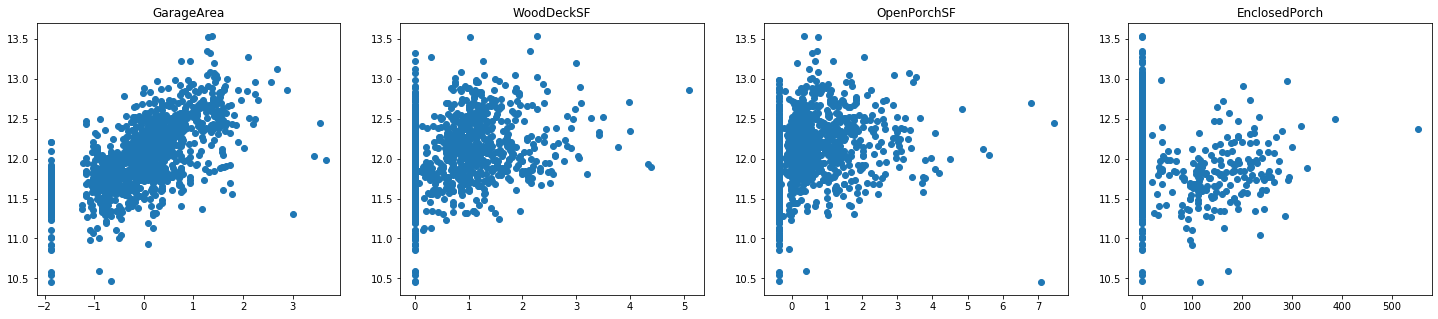

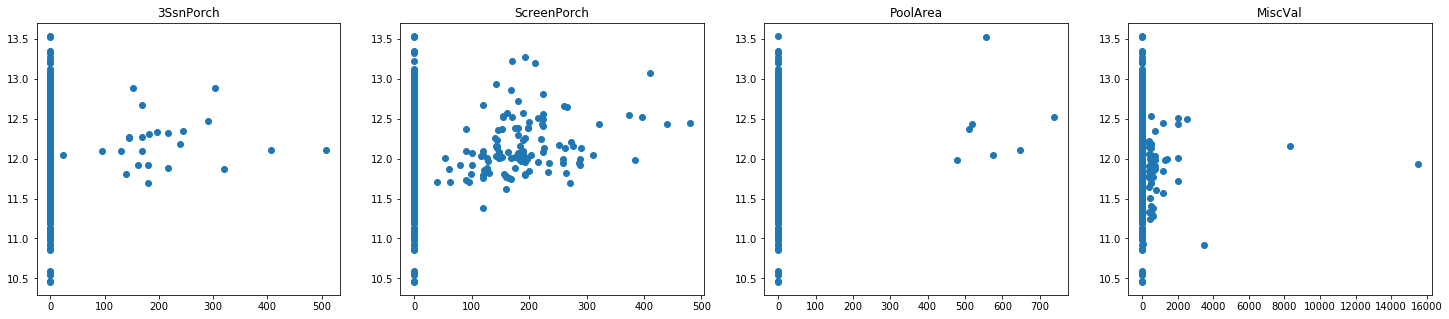

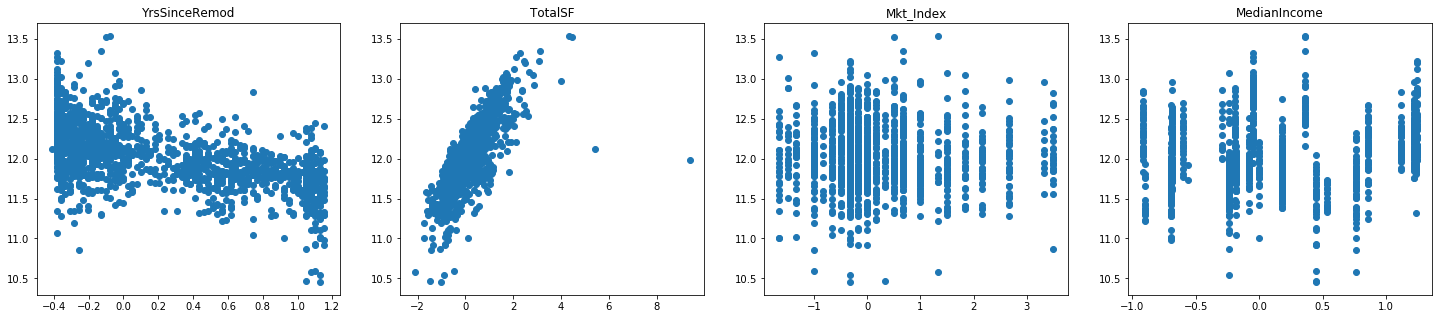

In [17]:
# vars = data_features.columns
vars = train.select_dtypes(include=np.number).columns
figures_per_time = 4
count = 0 
y = train['SalePrice']
for var in vars:
    x = train[var]
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('{}'.format(var))
    count+=1

In [18]:
# Remove outliers

train = train.drop(train[(train['GrLivArea']>4) & (train['SalePrice']<12.5)].index)
train = train.drop(train[train['BsmtFinSF2']>1200].index)
train = train.drop(train[train['LotArea']>20].index)
train = train.drop(train[train['EnclosedPorch']>400].index)
train = train.drop(train[train['LotFrontage']>6].index)
train = train.drop(train[(train['LotFrontage']>2) & (train['SalePrice']<11.5)].index)

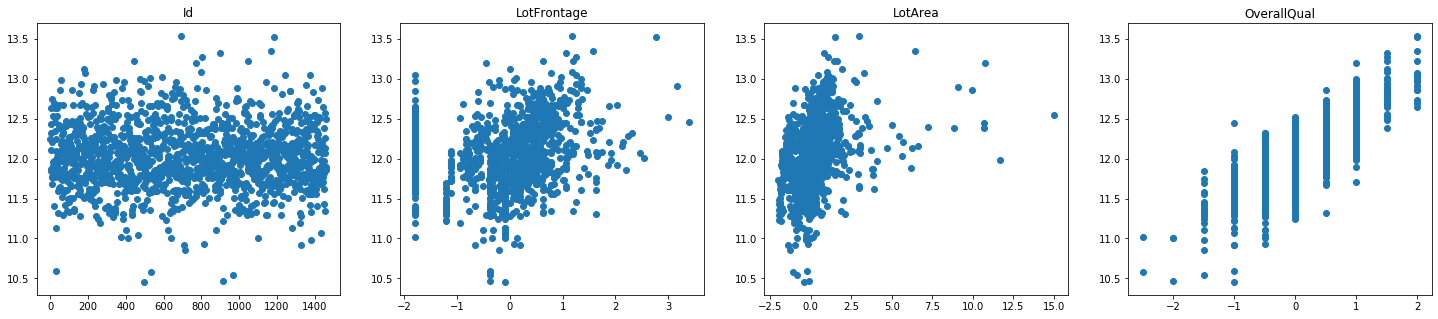

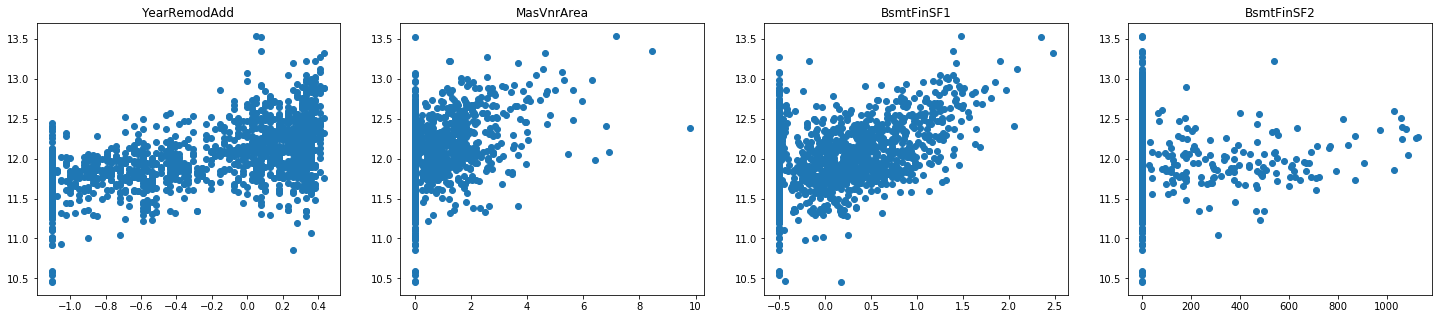

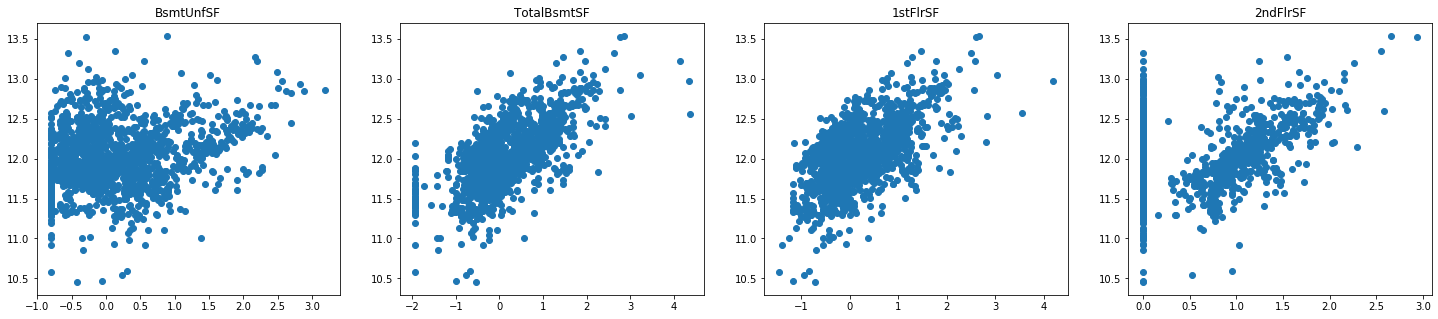

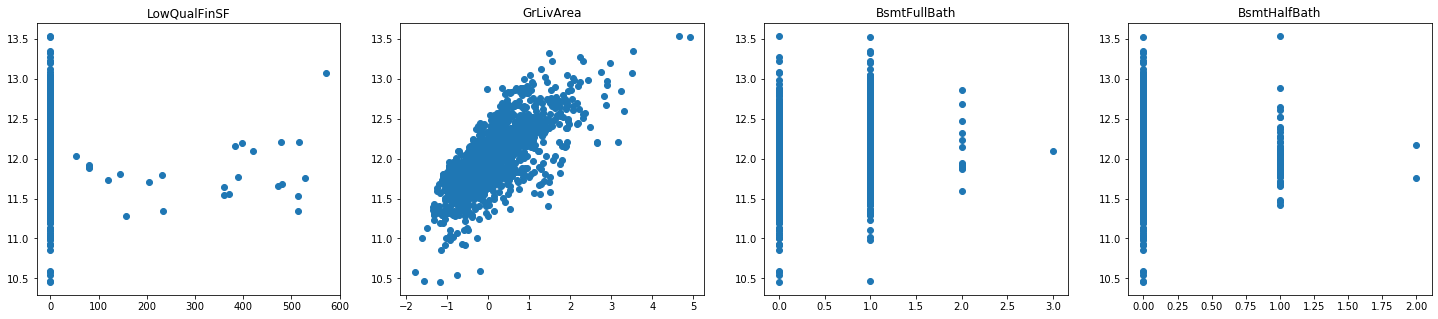

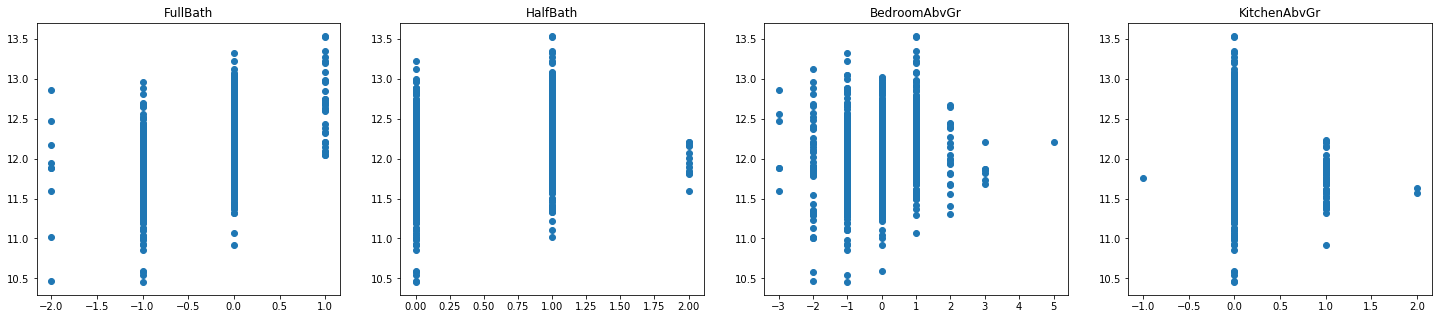

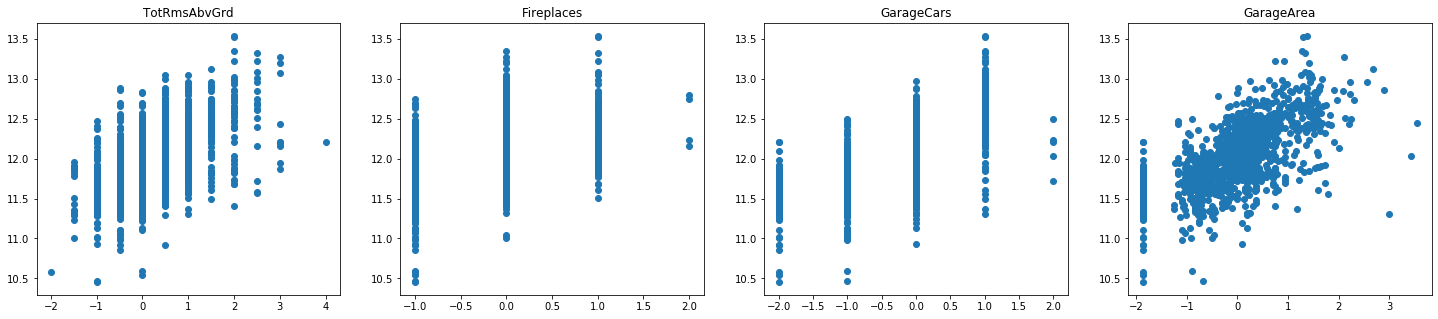

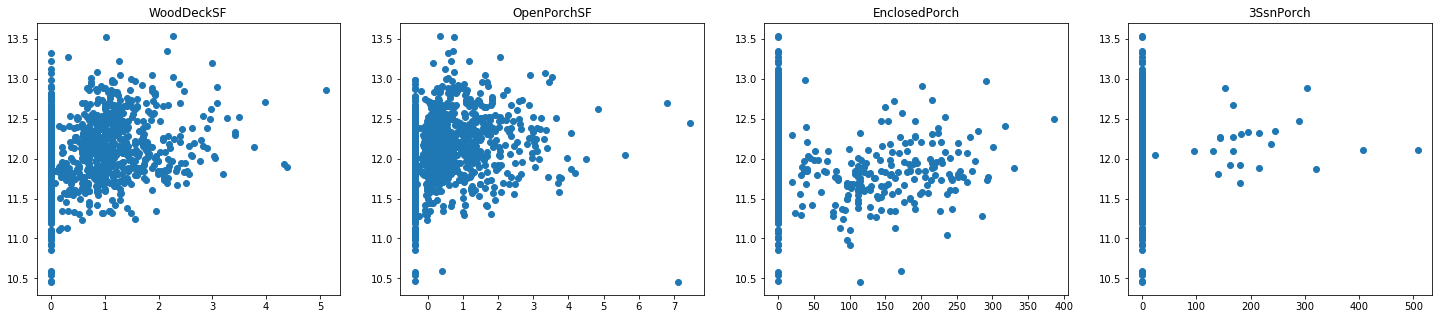

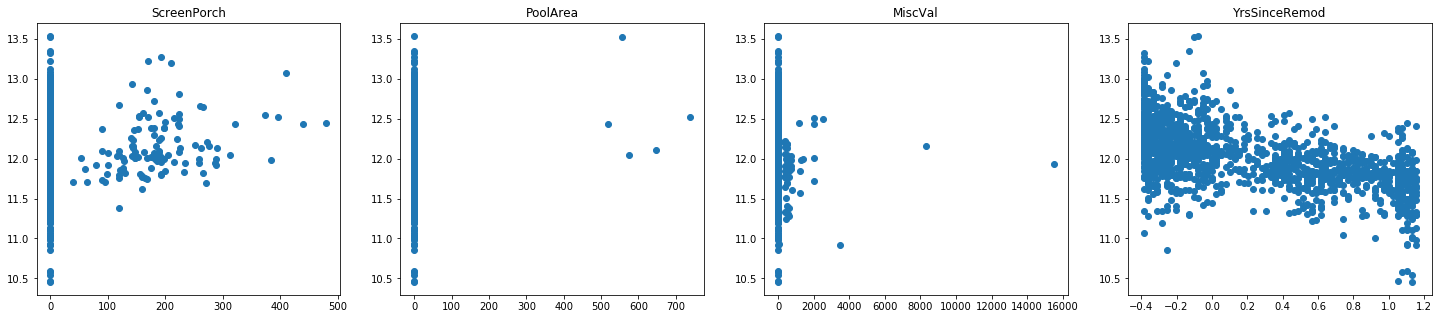

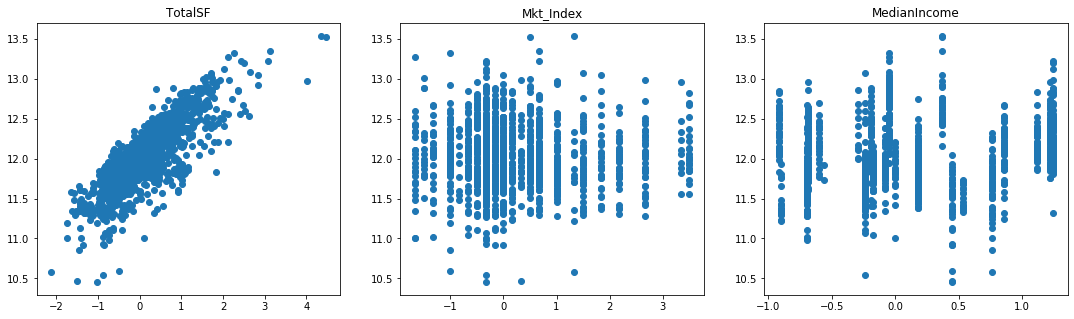

In [19]:
vars = train.select_dtypes(include=np.number).drop('SalePrice',axis=1).columns
figures_per_time = 4
count = 0 
y = train['SalePrice']
for var in vars:
    x = train[var]
    plt.figure(count//figures_per_time,figsize=(25,5))
    plt.subplot(1,figures_per_time,np.mod(count,4)+1)
    plt.scatter(x, y);
    plt.title('{}'.format(var))
    count+=1

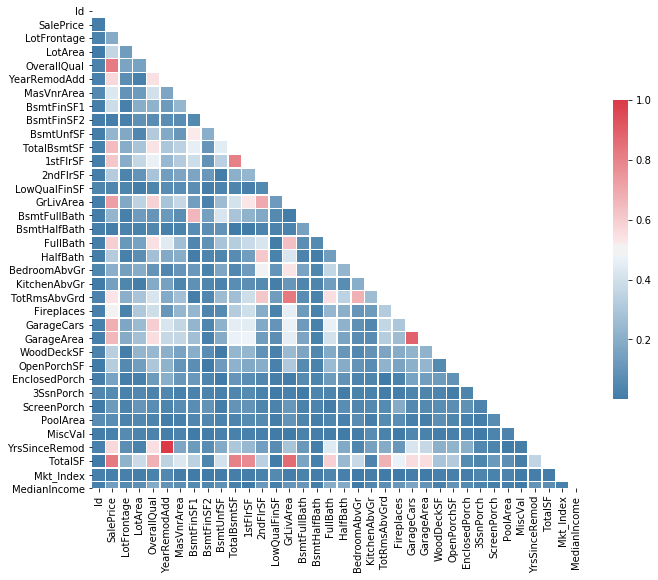

In [20]:
# Corrleation matrix of quantitative variables

corr = np.abs(train.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0.5, mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
train['TotalBath'] = train['FullBath'] + train['BsmtFullBath'] + (train['HalfBath'] + train['BsmtHalfBath']) * 0.5
train = train.drop(columns = ['GarageCars','YearRemodAdd','PoolQC','TotalSF','BedroomAbvGr','TotRmsAbvGrd','FullBath','BsmtFullBath','HalfBath','BsmtHalfBath','YearBuilt','Month','Year','GarageYrBlt','MoSold','YrSold','Fireplaces','BsmtExposure','ExterCond','Id'], axis = 1)

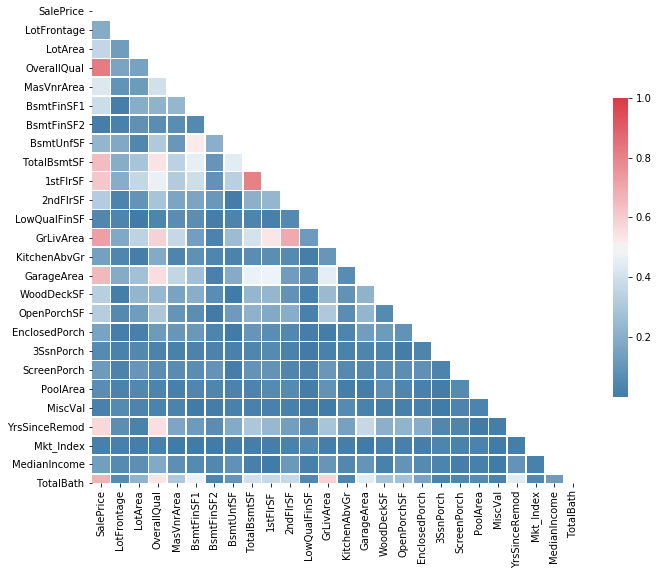

In [22]:
# Correlation matrix after removing highly correlated variables

corr = np.abs(train.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0.5, mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
train.groupby(by=(['BldgType']))["SalePrice"].median().sort_values()

BldgType
2fmCon    11.745970
Duplex    11.820263
Twnhs     11.831379
1Fam      12.028739
TwnhsE    12.056410
Name: SalePrice, dtype: float64

In [24]:
vars_box = train[['Neighborhood', 'ExterQual', 'KitchenQual']]
type(vars_box)

pandas.core.frame.DataFrame

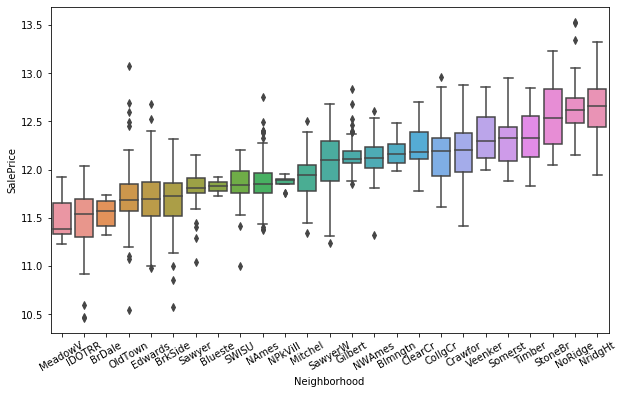

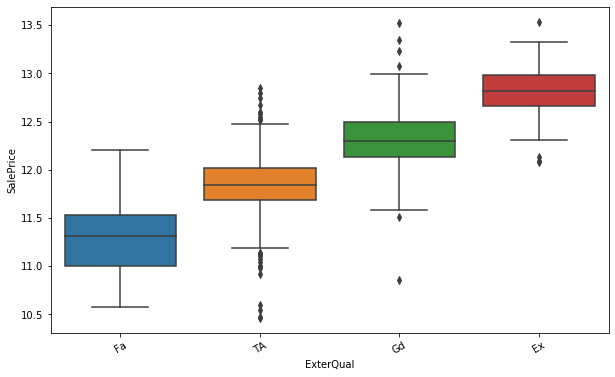

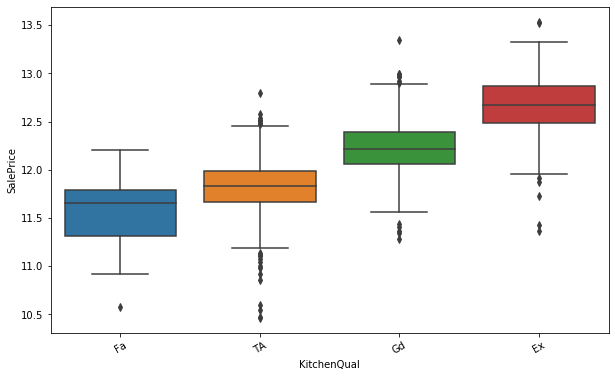

In [25]:
## Plot categorical Values
# vars_box = train.loc[:, train.dtypes == np.object]
vars_box = train[['Neighborhood', 'ExterQual', 'KitchenQual']]

for var in vars_box:
    meds = vars_box.median()
    meds.sort_values(ascending=False)
    data = pd.concat([train['SalePrice'], vars_box[var]], axis=1)
    my_order = data.groupby(by=var)["SalePrice"].median().sort_values().index
    f, ax = plt.subplots(figsize=(10, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data, order=my_order)
    fig.set_xticklabels(ax.get_xticklabels(), rotation=30)


In [26]:
train.groupby(by='ExterQual')["SalePrice"].median().iloc[::-1].index

Index(['TA', 'Gd', 'Fa', 'Ex'], dtype='object', name='ExterQual')

# Categorical Variables - One hot encoding

In [27]:
## Replicating steps on test set
test['TotalBath'] = test['FullBath'] + test['BsmtFullBath'] + (test['HalfBath'] + test['BsmtHalfBath']) * 0.5
test = test.drop(columns = ['GarageCars','YearRemodAdd','PoolQC','TotalSF','BedroomAbvGr','TotRmsAbvGrd','FullBath','BsmtFullBath','HalfBath','BsmtHalfBath','YearBuilt','Month','Year','GarageYrBlt','MoSold','YrSold','Fireplaces','BsmtExposure','ExterCond','Id'], axis = 1)

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
a = enc.fit_transform(train.select_dtypes(include=[np.object])).toarray()
train_dummies = pd.DataFrame(a, columns=enc.get_feature_names())
b = enc.fit_transform(test.select_dtypes(include=[np.object])).toarray()
test_dummies = pd.DataFrame(b, columns=enc.get_feature_names())

In [29]:
train_dummy_cols = train_dummies.columns
test_dummy_cols = test_dummies.columns

common_cols = train_dummy_cols.intersection(test_dummy_cols)
train_not_test = (train_dummy_cols.difference(test_dummy_cols))
test_not_train = (test_dummy_cols.difference(train_dummy_cols))

train_dummies = train_dummies[common_cols]
test_dummies = test_dummies[common_cols]

In [30]:
train.reset_index(drop=True, inplace=True)
train_dummies.reset_index(drop=True, inplace=True)
train_w_dummy = pd.concat([train.select_dtypes(exclude=[np.object]), train_dummies], axis=1)

In [31]:
test.reset_index(drop=True, inplace=True)
test_dummies.reset_index(drop=True, inplace=True)
test_w_dummy = pd.concat([test.select_dtypes(exclude=[np.object]), test_dummies], axis=1)

# Model Building

In [32]:
y = train_w_dummy['SalePrice']
x = train_w_dummy.drop(['SalePrice'],axis=1)

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge = Ridge()
ridge.fit(x, y)
print(f'Score = {ridge.score(x, y)}')
print(f'RMSE = {mean_squared_error(y, ridge.predict(x))}')

Score = 0.9445503214948939
RMSE = 0.008775384920578895


In [34]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(x,y)
print(f'Score = {ridgecv.score(x,y)}')
print(f'RMSE = {mean_squared_error(y, ridgecv.predict(x))}')

Score = 0.9378856941581287
RMSE = 0.009830119083319674


In [35]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(x,y)
lassocv.score(x,y)
print(f'Score = {lassocv.score(x,y)}')
print(f'RMSE = {mean_squared_error(y, lassocv.predict(x))}')

Score = 0.8977171768235876
RMSE = 0.01618712981453762


/Users/charleszien/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [36]:
from sklearn.model_selection import GridSearchCV

params = {
    "alpha": np.logspace(1e-3,1e2,50)
}

lasso = GridSearchCV(Ridge(), params, cv=5).fit(x,y)
print(f'Score = {lasso.score(x,y)}')
print(f'RMSE = {mean_squared_error(y, lasso.predict(x))}')
print(f'Best params = {lasso.best_params_}')

Score = 0.944546246932956
RMSE = 0.00877602975478449
Best params = {'alpha': 1.0023052380778996}


# Fitting Models and Predictions

In [37]:
## Ridge Model
predictions_ridge = ridge.predict(test_w_dummy)
final_predictions = np.e**(predictions_ridge)

In [38]:
# Determining most important features
coefs = list(zip(x.columns, ridge.coef_))

In [39]:
sorted(coefs, key=lambda x: x[1], reverse=True)[:20]

[('x1_FV', 0.27012337362659444),
 ('x1_RH', 0.2516453620468043),
 ('x1_RL', 0.2516156448968755),
 ('x1_RM', 0.2291513808688841),
 ('x9_Crawfor', 0.10381018484093306),
 ('OverallQual', 0.09621686287032742),
 ('GrLivArea', 0.09539787321516385),
 ('x40_Oth', 0.08875825455934583),
 ('x39_N/A', 0.08703143283811028),
 ('x9_StoneBr', 0.08651020961118215),
 ('x41_AdjLand', 0.08631621067985122),
 ('x14_9', 0.08629636548331256),
 ('x40_New', 0.08626328610322825),
 ('x17_BrkFace', 0.08366396685723448),
 ('x40_ConLD', 0.08284284342134791),
 ('x18_CmentBd', 0.08138182707916539),
 ('x31_Typ', 0.07666977170782249),
 ('x39_Shed', 0.07637023834071985),
 ('x41_Normal', 0.0751922173516018),
 ('x40_Con', 0.07267960806626017)]

In [40]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = final_predictions
submission.head()

Id      SalePrice
0  1461  123423.488649
1  1462  155126.577128
2  1463  183890.160558
3  1464  198597.789535
4  1465  199179.508439

In [41]:
## Final Submission to Kaggle
submission.to_csv('submission1.csv', index=False)